# Midterm Assignment: Analyzing Clean Energy Power Plants in California (Revised)

Author: Suzanne Caflisch

Description: This project visualizes where clean energy jobs are located across the state of California, by county. Ultimately, my group will use this data comparatively, analyzing it next to fossil fuel jobs by California county, and also demographic data across different regions of California, gathered from CalEnviroScreen 3.0 data. That will allow us to make arguments about which communities are burdened by environmental hazards, and which communities stand to gain and lose jobs from the transition from dirty to clean energy in the state. We will use County Business Patterns (CBP) data from 2018, drawn from the US Census Bureau, and the CA County Boundaries data set (also from the US Census Bureau).


In [1]:
#importing geopandas for visualization of data
import geopandas as gpd

# for general data wrangling tasks
import pandas as pd

# to provide basemaps 
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

#importing census data

clean = gpd.read_file('NAICSclean.csv')

In [2]:
#getting general information about the data set

clean.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   GEO_ID           37 non-null     object  
 1   NAME             37 non-null     object  
 2   NAICS2017        37 non-null     object  
 3   NAICS2017_LABEL  37 non-null     object  
 4   NAICS2017_F      37 non-null     object  
 5   LFO              37 non-null     object  
 6   LFO_LABEL        37 non-null     object  
 7   EMPSZES          37 non-null     object  
 8   EMPSZES_LABEL    37 non-null     object  
 9   YEAR             37 non-null     object  
 10  ESTAB            37 non-null     object  
 11  PAYANN           37 non-null     object  
 12  PAYANN_N         37 non-null     object  
 13  PAYQTR1          37 non-null     object  
 14  PAYQTR1_N        37 non-null     object  
 15  EMP              37 non-null     object  
 16  EMP_N            37 non-null     objec

In [3]:
#determining the number of rows and columns in the file

clean.shape

(37, 18)

In [4]:
#examining the first rows of data

clean.head()

,GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,NAICS2017_F,LFO,LFO_LABEL,EMPSZES,EMPSZES_LABEL,YEAR,ESTAB,PAYANN,PAYANN_N,PAYQTR1,PAYQTR1_N,EMP,EMP_N,geometry
0,id,Geographic Area Name,2017 NAICS code,Meaning of NAICS code,2017 NAICS Footnote,Legal form of organization code,Meaning of Legal form of organization code,Employment size of establishments,Meaning of Employment size of establishments,Year,Number of establishments,"Annual payroll ($1,000)",Noise range for annual payroll,"First-quarter payroll ($1,000)",Noise range for first-quarter payroll (%),Number of employees,Noise range for number of paid employees for p...,None
1,0500000US06001,"Alameda County, California",221115,Wind electric power generation,null,001,All establishments,001,All establishments,2018,4,5102,G,1779,G,47,G,None
2,0500000US06013,"Contra Costa County, California",221111,Hydroelectric power generation,null,001,All establishments,001,All establishments,2018,3,268,G,88,G,5,G,None
3,0500000US06013,"Contra Costa County, California",221111,Hydroelectric power generation,null,001,All establishments,210,Establishments with less than 5 employees,2018,3,N,N,N,N,N,N,None
4,0500000US06013,"Contra Costa County, California",221114,Solar electric power generation,null,001,All establishments,001,All establishments,2018,4,9589,G,2695,H,72,G,None


In [5]:
#dropping the first cell from the data set

clean = clean.drop([0])
clean.head()

,GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,NAICS2017_F,LFO,LFO_LABEL,EMPSZES,EMPSZES_LABEL,YEAR,ESTAB,PAYANN,PAYANN_N,PAYQTR1,PAYQTR1_N,EMP,EMP_N,geometry
1,0500000US06001,"Alameda County, California",221115,Wind electric power generation,null,001,All establishments,001,All establishments,2018,4,5102,G,1779,G,47,G,None
2,0500000US06013,"Contra Costa County, California",221111,Hydroelectric power generation,null,001,All establishments,001,All establishments,2018,3,268,G,88,G,5,G,None
3,0500000US06013,"Contra Costa County, California",221111,Hydroelectric power generation,null,001,All establishments,210,Establishments with less than 5 employees,2018,3,N,N,N,N,N,N,None
4,0500000US06013,"Contra Costa County, California",221114,Solar electric power generation,null,001,All establishments,001,All establishments,2018,4,9589,G,2695,H,72,G,None
5,0500000US06019,"Fresno County, California",221111,Hydroelectric power generation,null,001,All establishments,001,All establishments,2018,4,9552,J,2470,J,100,J,None


In [6]:
#importing a new data set "counties" which pulls data from the CA Counties Data set (which has geometry data in it)

counties = gpd.read_file('CA_Counties_TIGER2016.shp')

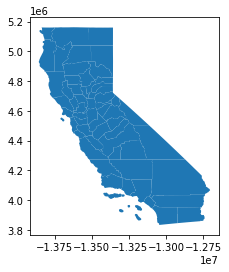

In [7]:
#plotting the data

counties.plot()

In [8]:
counties.head(10)

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,091,00277310,06091,Sierra,Sierra County,06,H1,G4020,None,None,None,A,2468694587,23299110,+39.5769252,-120.5219926,"POLYGON ((-13431319.751 4821511.426, -13431312..."
1,06,067,00277298,06067,Sacramento,Sacramento County,06,H1,G4020,472,40900,None,A,2499183617,76073827,+38.4500114,-121.3404409,"POLYGON ((-13490651.476 4680831.603, -13490511..."
2,06,083,00277306,06083,Santa Barbara,Santa Barbara County,06,H1,G4020,None,42200,None,A,7084000598,2729814515,+34.5370572,-120.0399729,"MULTIPOLYGON (((-13423116.772 4042044.149, -13..."
3,06,009,01675885,06009,Calaveras,Calaveras County,06,H1,G4020,None,None,None,A,2641820834,43806026,+38.1838996,-120.5614415,"POLYGON ((-13428575.483 4627725.228, -13428534..."
4,06,111,00277320,06111,Ventura,Ventura County,06,H1,G4020,348,37100,None,A,4773390489,945942791,+34.3587415,-119.1331432,"MULTIPOLYGON (((-13317853.594 3931602.414, -13..."
5,06,037,00277283,06037,Los Angeles,Los Angeles County,06,H1,G4020,348,31080,31084,A,10510651024,1794730436,+34.1963983,-118.2618616,"MULTIPOLYGON (((-13210018.388 3958856.141, -13..."
6,06,097,01657246,06097,Sonoma,Sonoma County,06,H1,G4020,488,42220,None,A,4081437574,497508807,+38.5251824,-122.9261095,"POLYGON ((-13685069.767 4623872.832, -13685073..."
7,06,031,00277280,06031,Kings,Kings County,06,H1,G4020,546,25260,None,A,3598583450,5468555,+36.0724780,-119.8155301,"POLYGON ((-13353767.857 4335831.239, -13353767..."
8,06,073,00277301,06073,San Diego,San Diego County,06,H1,G4020,None,41740,None,A,10895149811,826195031,+33.0236041,-116.7761174,"POLYGON ((-13073075.796 3919158.524, -13074423..."
9,06,061,00277295,06061,Placer,Placer County,06,H1,G4020,472,40900,None,A,3644333049,246486852,+39.0620323,-120.7227181,"POLYGON ((-13476944.153 4722608.150, -13476936..."


In [9]:
print(counties.crs)

epsg:3857


In [10]:
#Running the value counts to see which counties have multiple rows associated with them.

clean['NAME'].value_counts()

Los Angeles County, California        5
San Diego County, California          4
Kern County, California               4
Riverside County, California          4
Contra Costa County, California       3
San Bernardino County, California     2
San Luis Obispo County, California    2
Shasta County, California             2
Imperial County, California           2
Orange County, California             2
Fresno County, California             2
Solano County, California             1
San Francisco County, California      1
Inyo County, California               1
Alameda County, California            1
Name: NAME, dtype: int64

In [11]:
#I can see all 15 rows of LA county data by running this command.

clean[clean.NAME == 'Los Angeles County, California']

,GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,NAICS2017_F,LFO,LFO_LABEL,EMPSZES,EMPSZES_LABEL,YEAR,ESTAB,PAYANN,PAYANN_N,PAYQTR1,PAYQTR1_N,EMP,EMP_N,geometry
14,0500000US06037,"Los Angeles County, California",221111,Hydroelectric power generation,null,001,All establishments,001,All establishments,2018,3,4773,J,770,H,7,J,None
15,0500000US06037,"Los Angeles County, California",221114,Solar electric power generation,null,001,All establishments,001,All establishments,2018,11,25926,J,4588,J,198,J,None
16,0500000US06037,"Los Angeles County, California",221114,Solar electric power generation,null,001,All establishments,210,Establishments with less than 5 employees,2018,7,N,N,N,N,N,N,None
17,0500000US06037,"Los Angeles County, California",221118,Other electric power generation,null,001,All establishments,001,All establishments,2018,3,101,H,26,J,5,G,None
18,0500000US06037,"Los Angeles County, California",221118,Other electric power generation,null,001,All establishments,210,Establishments with less than 5 employees,2018,3,N,N,N,N,N,N,None


In [12]:
#dropping certain columns that are unneccessary. I only need the geoID, name, job title, employment count, and geometry.

desired_columns = ['GEO_ID', 'NAME', 'NAICS2017_LABEL','EMP', 'geometry']

clean[desired_columns]

,GEO_ID,NAME,NAICS2017_LABEL,EMP,geometry
1,0500000US06001,"Alameda County, California",Wind electric power generation,47,None
2,0500000US06013,"Contra Costa County, California",Hydroelectric power generation,5,None
3,0500000US06013,"Contra Costa County, California",Hydroelectric power generation,N,None
4,0500000US06013,"Contra Costa County, California",Solar electric power generation,72,None
5,0500000US06019,"Fresno County, California",Hydroelectric power generation,100,None
6,0500000US06019,"Fresno County, California",Hydroelectric power generation,N,None
7,0500000US06025,"Imperial County, California",Geothermal electric power generation,350,None
8,0500000US06025,"Imperial County, California",Geothermal electric power generation,N,None
9,0500000US06027,"Inyo County, California",Hydroelectric power generation,33,None
10,0500000US06029,"Kern County, California",Wind electric power generation,178,None


In [13]:
#creating a new data frame, clean_trimmed, which only contains the 5 columns I want to conserve. 

clean_trimmed = clean[desired_columns].copy()
clean_trimmed

,GEO_ID,NAME,NAICS2017_LABEL,EMP,geometry
1,0500000US06001,"Alameda County, California",Wind electric power generation,47,None
2,0500000US06013,"Contra Costa County, California",Hydroelectric power generation,5,None
3,0500000US06013,"Contra Costa County, California",Hydroelectric power generation,N,None
4,0500000US06013,"Contra Costa County, California",Solar electric power generation,72,None
5,0500000US06019,"Fresno County, California",Hydroelectric power generation,100,None
6,0500000US06019,"Fresno County, California",Hydroelectric power generation,N,None
7,0500000US06025,"Imperial County, California",Geothermal electric power generation,350,None
8,0500000US06025,"Imperial County, California",Geothermal electric power generation,N,None
9,0500000US06027,"Inyo County, California",Hydroelectric power generation,33,None
10,0500000US06029,"Kern County, California",Wind electric power generation,178,None


Great, looks like it worked! Now I'd like to rename the columns to be more intuitive.

In [14]:
#generating a list of the names of each column

list(clean_trimmed)

['GEO_ID', 'NAME', 'NAICS2017_LABEL', 'EMP', 'geometry']

In [15]:
#renaming the column "NAICS2017" as "JOBTYPE"

clean_trimmed.columns = ['GEO_ID', 'NAME', 'JOBTYPE', 'EMP', 'geometry']

In [16]:
#Testing to see if it worked

clean_trimmed

,GEO_ID,NAME,JOBTYPE,EMP,geometry
1,0500000US06001,"Alameda County, California",Wind electric power generation,47,None
2,0500000US06013,"Contra Costa County, California",Hydroelectric power generation,5,None
3,0500000US06013,"Contra Costa County, California",Hydroelectric power generation,N,None
4,0500000US06013,"Contra Costa County, California",Solar electric power generation,72,None
5,0500000US06019,"Fresno County, California",Hydroelectric power generation,100,None
6,0500000US06019,"Fresno County, California",Hydroelectric power generation,N,None
7,0500000US06025,"Imperial County, California",Geothermal electric power generation,350,None
8,0500000US06025,"Imperial County, California",Geothermal electric power generation,N,None
9,0500000US06027,"Inyo County, California",Hydroelectric power generation,33,None
10,0500000US06029,"Kern County, California",Wind electric power generation,178,None


Success! NAICS2017 is now showing up as JOBTYPE. Now I want to get rid of the rows where employment is N (for "null").

In [17]:
#dropping all rows in the data frame where the value in the "EMP" column is equal to N

clean_trimmed2 = clean_trimmed[clean_trimmed.EMP != 'N']
clean_trimmed2

,GEO_ID,NAME,JOBTYPE,EMP,geometry
1,0500000US06001,"Alameda County, California",Wind electric power generation,47,None
2,0500000US06013,"Contra Costa County, California",Hydroelectric power generation,5,None
4,0500000US06013,"Contra Costa County, California",Solar electric power generation,72,None
5,0500000US06019,"Fresno County, California",Hydroelectric power generation,100,None
7,0500000US06025,"Imperial County, California",Geothermal electric power generation,350,None
9,0500000US06027,"Inyo County, California",Hydroelectric power generation,33,None
10,0500000US06029,"Kern County, California",Wind electric power generation,178,None
14,0500000US06037,"Los Angeles County, California",Hydroelectric power generation,7,None
15,0500000US06037,"Los Angeles County, California",Solar electric power generation,198,None
17,0500000US06037,"Los Angeles County, California",Other electric power generation,5,None


No more rows with "N"! Now I would like to check what type of data is in each column, in order to make sure EMP is registering as an integer.

In [18]:
#using the print command to see data types

print(clean_trimmed2.dtypes)

GEO_ID        object
NAME          object
JOBTYPE       object
EMP           object
geometry    geometry
dtype: object


EMP is an object. I need to change it to an integer.

In [19]:
#changing EMP to an integer. I found this code on stack overflow; must first convert it to a string variable and then to an integer.

clean_trimmed2['EMP'] = clean_trimmed2['EMP'].astype(str).astype(int)

/opt/conda/lib/python3.8/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [20]:
#testing to see whether EMP successfully changed.

print(clean_trimmed2.dtypes)

GEO_ID        object
NAME          object
JOBTYPE       object
EMP            int64
geometry    geometry
dtype: object


Huzzah! EMP is now an integer. Now I can plot the number of jobs by county in a histogram format.

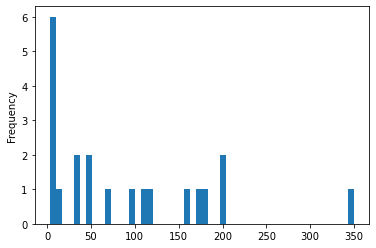

In [21]:
# plotting the number of jobs as a historgram with 50 bins
clean_trimmed2['EMP'].plot.hist(bins=50)

This histogram shows a wide distribution of the number of jobs by county-- it looks like one county has around 350, four counties have around 200 jobs, and the rest of the counties fall below ~175 jobs. Now I need to combine the rows that have overlapping counties, in order to not generate duplications in my map.

In [22]:
#I want to see how many different variables exist in the JOBTYPE column.

clean_trimmed2.JOBTYPE.unique()

array(['Wind electric power generation', 'Hydroelectric power generation',
       'Solar electric power generation',
       'Geothermal electric power generation',
       'Other electric power generation'], dtype=object)

Now I want to add geometry data to my clean energy data set.

In [23]:
# adding geometry data to the data frame I'm working with. create a for loop to iterate through each row and run the following code. 
for index, row in clean_trimmed2.iterrows():
    
    # create a new variable 'geomid' to store the value of GEO_ID for a row 
    geomid = row['GEO_ID']
    
    # isolate the last 5 digits of the GEO_ID column from the ffjobs dataset. 
    last_digits = geomid[-5:]
    
    # create a new variable 'countyrow' that finds the collection of rows in county dataset where 
    # GEOID is equal to the last 5 digits in the ffjobs dataset. In other words, we are creating a 
    # dataframe containing the single row in the counties dataset that corresponds to last_digits 
    countyrow = counties[counties.GEOID == last_digits]

    # Set the geometry field in this ffjobs row equal to the geometry data we pulled from the counties dataframe. 
    # Workaround because of a geopandas bug that prevents me from inserting multipolygon data into the geometry column.
    # Issue here: https://github.com/geopandas/geopandas/issues/992
    clean_trimmed2.loc[[index], 'geometry'] = countyrow['geometry'].values

/opt/conda/lib/python3.8/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)
/opt/conda/lib/python3.8/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)
/opt/conda/lib/python3.8/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [24]:
clean_trimmed2

,GEO_ID,NAME,JOBTYPE,EMP,geometry
1,0500000US06001,"Alameda County, California",Wind electric power generation,47,"POLYGON ((-13612246.763 4538150.085, -13612346..."
2,0500000US06013,"Contra Costa County, California",Hydroelectric power generation,5,"POLYGON ((-13610773.230 4565908.502, -13610791..."
4,0500000US06013,"Contra Costa County, California",Solar electric power generation,72,"POLYGON ((-13610773.230 4565908.502, -13610791..."
5,0500000US06019,"Fresno County, California",Hydroelectric power generation,100,"POLYGON ((-13325540.690 4439078.780, -13325502..."
7,0500000US06025,"Imperial County, California",Geothermal electric power generation,350,"POLYGON ((-12839095.428 3852391.851, -12839118..."
9,0500000US06027,"Inyo County, California",Hydroelectric power generation,33,"POLYGON ((-13173280.421 4391099.816, -13173296..."
10,0500000US06029,"Kern County, California",Wind electric power generation,178,"POLYGON ((-13348728.860 4223737.154, -13349798..."
14,0500000US06037,"Los Angeles County, California",Hydroelectric power generation,7,"MULTIPOLYGON (((-13210018.388 3958856.141, -13..."
15,0500000US06037,"Los Angeles County, California",Solar electric power generation,198,"MULTIPOLYGON (((-13210018.388 3958856.141, -13..."
17,0500000US06037,"Los Angeles County, California",Other electric power generation,5,"MULTIPOLYGON (((-13210018.388 3958856.141, -13..."


In [25]:
#create new geopandas dataframe with just the NAME, geometry, and EMP columns. 

clean_counties = clean_trimmed2[['NAME', 'geometry', 'EMP']]
clean_counties['EMP'] = clean_counties["EMP"].astype(int)

#dissolve rows and sum EMP.
clean_counties = clean_counties.dissolve(by= 'NAME', aggfunc= 'sum')

#check to see what the data looks like. 
clean_counties.head(25)

/opt/conda/lib/python3.8/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


,geometry,EMP
NAME,,
"Alameda County, California","POLYGON ((-13612246.763 4538150.085, -13612346...",47
"Contra Costa County, California","POLYGON ((-13610773.230 4565908.502, -13610791...",77
"Fresno County, California","POLYGON ((-13325540.690 4439078.780, -13325502...",100
"Imperial County, California","POLYGON ((-12839095.428 3852391.851, -12839118...",350
"Inyo County, California","POLYGON ((-13173280.421 4391099.816, -13173296...",33
"Kern County, California","POLYGON ((-13348728.860 4223737.154, -13349798...",178
"Los Angeles County, California","MULTIPOLYGON (((-13211237.221 3898803.431, -13...",210
"Orange County, California","POLYGON ((-13134488.102 3973319.471, -13134662...",203
"Riverside County, California","POLYGON ((-13099281.751 4011348.117, -13099285...",120


Now that employment has been dissolved into total employment per county, I want to add back in the individual JOBTYPE employment counts.

I'm going to do this by creating new columns for each value in JOBTYPE.

In [26]:
#creating new data frame job_types, which equals the unique values of JOBTYPE
#the clean_trimmed2.JOBTYPE.unique() function pulls up the unique JOBTYPE values in the clean_trimmed2 dataframe
job_types = clean_trimmed2.JOBTYPE.unique()

#create a "for" loop that creates a new column in clean_counties called jobs that gives it a default value 0 for all rows
for job in job_types:
    clean_counties[job] = 0

clean_counties.head(10)

,geometry,EMP,Wind electric power generation,Hydroelectric power generation,Solar electric power generation,Geothermal electric power generation,Other electric power generation
NAME,,,,,,,
"Alameda County, California","POLYGON ((-13612246.763 4538150.085, -13612346...",47,0,0,0,0,0
"Contra Costa County, California","POLYGON ((-13610773.230 4565908.502, -13610791...",77,0,0,0,0,0
"Fresno County, California","POLYGON ((-13325540.690 4439078.780, -13325502...",100,0,0,0,0,0
"Imperial County, California","POLYGON ((-12839095.428 3852391.851, -12839118...",350,0,0,0,0,0
"Inyo County, California","POLYGON ((-13173280.421 4391099.816, -13173296...",33,0,0,0,0,0
"Kern County, California","POLYGON ((-13348728.860 4223737.154, -13349798...",178,0,0,0,0,0
"Los Angeles County, California","MULTIPOLYGON (((-13211237.221 3898803.431, -13...",210,0,0,0,0,0
"Orange County, California","POLYGON ((-13134488.102 3973319.471, -13134662...",203,0,0,0,0,0
"Riverside County, California","POLYGON ((-13099281.751 4011348.117, -13099285...",120,0,0,0,0,0


Now I am going to create a "for" loop to iterate through each row and add the EMP values to each job type column. I would like to transpose the data from rows to column values. We cannot use the merge function because merge transfers data between columns. 

In [27]:
# create a for loop to iterate through each row and run the following code. 
for index, row in clean_counties.iterrows():
    
    #define a new variable that returns a dataframe which includes only 
    # the rows in ffjobs_trimmed2 equal to a particular NAME in the ffjobs_counties dataframe.
    # for example, all the LA county rows in the ffjobs_trimmed2 dataframe where 
    # the county NAME is equal to a particular county NAME value in the ffjobs_counties dataframe. 
    
    countyrows = clean_trimmed2[clean_trimmed2['NAME'] == index]
    
    #now, let's create another loop ( a loop within a loop!)
    # this loop says for a new varaiable trimmed_index, iterate through each row in the countrows datagrame we created above
    for trimmed_index, trimmed_row in countyrows.iterrows():
        # where the value in the ffjobs_counties row is equal to the value of ffjobs_trimmed2 JOBTYPE,
        # we set equal to the employment value for that JOBTYPE in the ffjobs_trimmed2 dataframe. 
        row[trimmed_row.JOBTYPE] = trimmed_row.EMP
        clean_counties.loc[[index], trimmed_row.JOBTYPE] = trimmed_row.EMP

#check the results
clean_counties.head()    
    
    

,geometry,EMP,Wind electric power generation,Hydroelectric power generation,Solar electric power generation,Geothermal electric power generation,Other electric power generation
NAME,,,,,,,
"Alameda County, California","POLYGON ((-13612246.763 4538150.085, -13612346...",47,47,0,0,0,0
"Contra Costa County, California","POLYGON ((-13610773.230 4565908.502, -13610791...",77,0,5,72,0,0
"Fresno County, California","POLYGON ((-13325540.690 4439078.780, -13325502...",100,0,100,0,0,0
"Imperial County, California","POLYGON ((-12839095.428 3852391.851, -12839118...",350,0,0,0,350,0
"Inyo County, California","POLYGON ((-13173280.421 4391099.816, -13173296...",33,0,33,0,0,0


In [28]:
#looking at the entire data frame

clean_counties

,geometry,EMP,Wind electric power generation,Hydroelectric power generation,Solar electric power generation,Geothermal electric power generation,Other electric power generation
NAME,,,,,,,
"Alameda County, California","POLYGON ((-13612246.763 4538150.085, -13612346...",47,47,0,0,0,0
"Contra Costa County, California","POLYGON ((-13610773.230 4565908.502, -13610791...",77,0,5,72,0,0
"Fresno County, California","POLYGON ((-13325540.690 4439078.780, -13325502...",100,0,100,0,0,0
"Imperial County, California","POLYGON ((-12839095.428 3852391.851, -12839118...",350,0,0,0,350,0
"Inyo County, California","POLYGON ((-13173280.421 4391099.816, -13173296...",33,0,33,0,0,0
"Kern County, California","POLYGON ((-13348728.860 4223737.154, -13349798...",178,178,0,0,0,0
"Los Angeles County, California","MULTIPOLYGON (((-13211237.221 3898803.431, -13...",210,0,7,198,0,5
"Orange County, California","POLYGON ((-13134488.102 3973319.471, -13134662...",203,0,0,203,0,0
"Riverside County, California","POLYGON ((-13099281.751 4011348.117, -13099285...",120,112,0,8,0,0


Awesome! Now time to map!

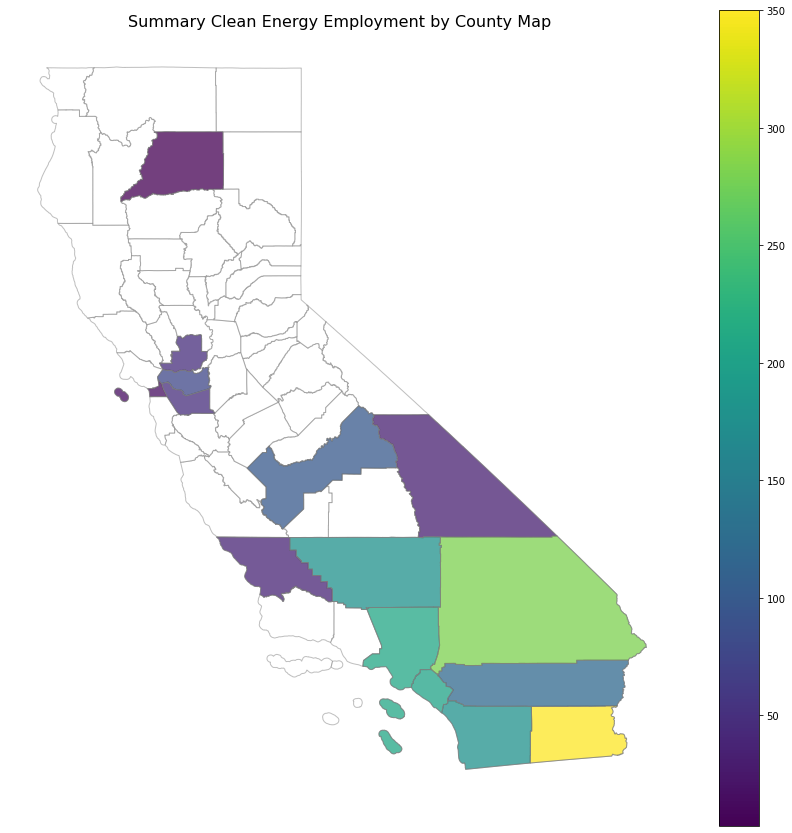

In [29]:
#I will map data by county by using subplots to create multiple layered maps.
fig, ax = plt.subplots(figsize=(15, 15))

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Summary Clean Energy Employment by County Map ',fontsize=16)

# add a basemap
counties.plot(alpha=0.5, color = 'white', edgecolor ='grey', ax=ax)

# plot employment values for clean
clean_counties.plot(column = 'EMP',
            alpha=0.75, 
            legend = True, 
            linewidth = 1, 
            edgecolor='grey',
            figsize=(12,10),
            ax=ax)


White counties have no clean energy jobs. The lightest color counties have the highest number of clean energy jobs. I set the boundaries to grey for aesthetic purposes. Now I'm going to visualize some of the data subsets side by side.

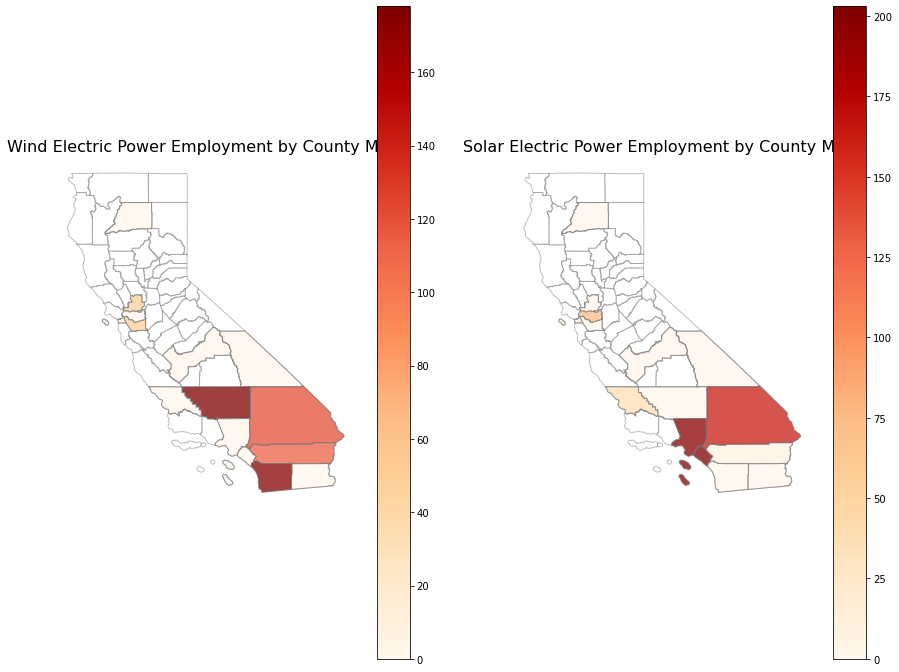

In [30]:
# use subplots that make it easier to create multiple layered maps
fig, axs = plt.subplots(1, 2, figsize=(15, 12))

# name each subplot
ax1, ax2 = axs

# turn the axis off
ax1.axis('off')
ax2.axis('off')

# set a title for ax1
ax1.set_title('Wind Electric Power Employment by County Map ',fontsize=16)

# add a basemap
counties.plot(alpha=0.5, color = 'white', edgecolor ='grey', ax=ax1)

# define wind electric power variable
# wind = clean_counties[clean_counties == 'Wind Electric Power generation']

# plot EMPlOYMENT values for Wind electric power 
clean_counties.plot(column = 'Wind electric power generation',
            alpha=0.75, 
            legend = True, 
            linewidth = 1, 
            cmap = 'OrRd', 
            edgecolor='grey',
            figsize=(12,10), ax=ax1)


# set a title for ax2
ax2.set_title('Solar Electric Power Employment by County Map ',fontsize=16)

# add a basemap
counties.plot(alpha=0.5, color = 'white', edgecolor ='grey', ax=ax2)

# define Solar electric power variable
# solar = clean_trimmed2[clean_trimmed2.JOBTYPE_NAICS == 'solar electric power generation']

# plot EMP values for solar electric power generation
clean_counties.plot(column = 'Solar electric power generation',
            alpha=0.75, 
            legend = True, 
            linewidth = 1, 
            cmap = 'OrRd', 
            edgecolor='grey',
            figsize=(12,10),
            ax=ax2)

Now I'll try to plot the data from counties with over 500 clean energy jobs per county.

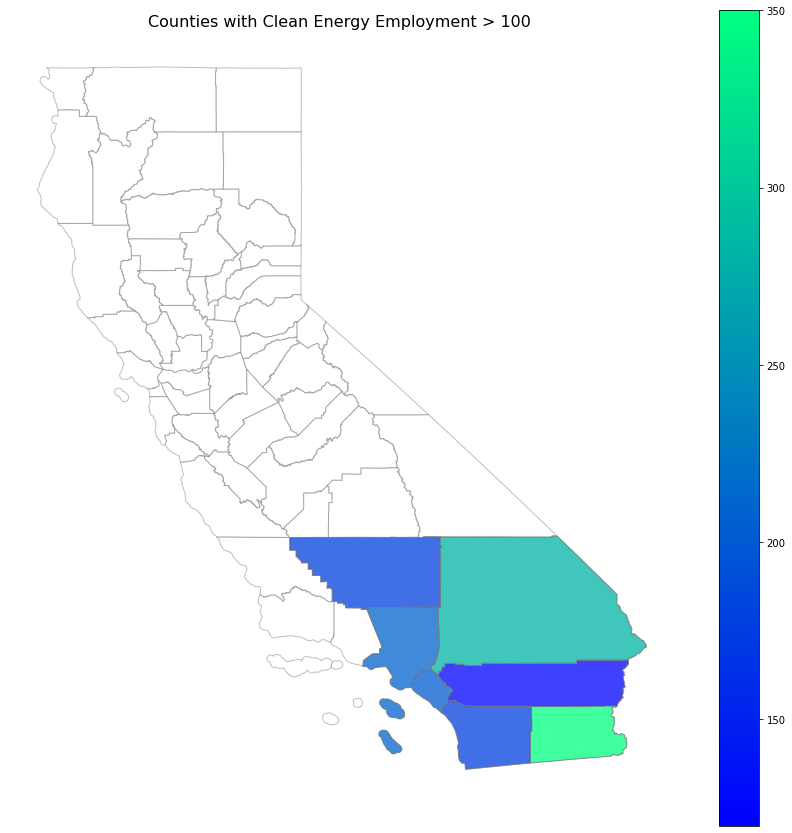

In [31]:
# use subplots that make it easier to create multiple layered maps
fig, ax = plt.subplots(figsize=(15, 15))

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Counties with Clean Energy Employment > 100 ',fontsize=16)

# add a basemap
counties.plot(alpha=0.5, color = 'white', edgecolor ='grey', ax=ax)

# plot all of the values where EMP is greater than 100 using the noN variable, which excludes all N values. 
clean_counties[clean_counties['EMP'] > 100].plot(column = 'EMP',
            alpha=0.75, 
            legend = True, 
            linewidth = 1, 
            cmap = 'winter', 
            edgecolor='grey',
            figsize=(12,10),                                     
            ax=ax)


This plot shows just the counties where clean energy employment > 100. It looks like it's just southern California counties. 

In [32]:
gdf = gpd.read_file('CES3June2018Update.shp')

In [33]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

In [34]:
gdf.head()

,tract,pop2010,California,ZIP,City,Longitude,Latitude,CIscore,CIscoreP,ozone,...,Native_Ame,Asian_Amer,Other_pct,OBJECTID_1,CIdecile,CIvigintil,Shape_Leng,Shape_Area,CES2018_Rn,geometry
0,6.083002e+09,3930,Santa Barbara,93454,Santa Maria,-120.427059,34.930669,29.51,59,0.035,...,0.5,7.2,1.6,3507,6,12,6999.357622,2.847611e+06,55-60%,"POLYGON ((-39795.070 -341919.191, -38126.384 -..."
1,6.083002e+09,11406,Santa Barbara,93455,Santa Maria,-120.478083,34.928796,33.17,65,0.035,...,0.2,5.5,1.6,2733,7,14,19100.578003,1.635292e+07,65-70%,"POLYGON ((-39795.070 -341919.191, -39803.632 -..."
2,6.083002e+09,2084,Santa Barbara,93454,Santa Maria,-120.426777,34.942111,22.85,45,0.035,...,0.5,2.9,2.6,4689,5,9,4970.985933,1.352330e+06,40-45%,"POLYGON ((-38115.747 -341130.248, -38126.384 -..."
3,6.083002e+09,4375,Santa Barbara,93455,Santa Maria,-120.410028,34.871428,4.45,2,0.035,...,0.6,4.0,2.6,7864,1,1,6558.956142,2.417717e+06,1-5% (lowest scores),"POLYGON ((-37341.662 -348530.437, -37252.307 -..."
4,6.083002e+09,3826,Santa Barbara,93455,Santa Maria,-120.427716,34.872288,5.28,3,0.035,...,0.8,3.5,3.2,7863,1,1,6570.368642,2.608422e+06,1-5% (lowest scores),"POLYGON ((-39465.107 -348499.262, -38244.305 -..."


In [35]:
columns_to_keep = ['tract', 'pop2010', 'California', 'ZIP', 'City', 'Longitude', 'Latitude', 'CIscore', 'CIscoreP', 'edu', 'eduP', 'pov', 'povP', 'unemp', 'unempP', 'Pop_11_64_', 'Elderly_ov', 'Hispanic_p', 'White_pct', 'African_Am', 'Native_Ame', 'Asian_Amer', 'Other_pct', 'geometry']

In [36]:
#double-checking that columns came out as desired

columns_to_keep

['tract',
 'pop2010',
 'California',
 'ZIP',
 'City',
 'Longitude',
 'Latitude',
 'CIscore',
 'CIscoreP',
 'edu',
 'eduP',
 'pov',
 'povP',
 'unemp',
 'unempP',
 'Pop_11_64_',
 'Elderly_ov',
 'Hispanic_p',
 'White_pct',
 'African_Am',
 'Native_Ame',
 'Asian_Amer',
 'Other_pct',
 'geometry']

In [37]:
# to redefine the dataframe with only those columns

gdf = gdf[columns_to_keep]

In [38]:
# to check the new dataframe

gdf.head()

,tract,pop2010,California,ZIP,City,Longitude,Latitude,CIscore,CIscoreP,edu,...,unempP,Pop_11_64_,Elderly_ov,Hispanic_p,White_pct,African_Am,Native_Ame,Asian_Amer,Other_pct,geometry
0,6.083002e+09,3930,Santa Barbara,93454,Santa Maria,-120.427059,34.930669,29.51,59,24.8,...,32,70.5,13.1,57.5,31.3,1.9,0.5,7.2,1.6,"POLYGON ((-39795.070 -341919.191, -38126.384 -..."
1,6.083002e+09,11406,Santa Barbara,93455,Santa Maria,-120.478083,34.928796,33.17,65,46.0,...,61,73.2,6.2,74.0,17.4,1.4,0.2,5.5,1.6,"POLYGON ((-39795.070 -341919.191, -39803.632 -..."
2,6.083002e+09,2084,Santa Barbara,93454,Santa Maria,-120.426777,34.942111,22.85,45,26.2,...,7,72.5,13.2,52.2,40.9,0.8,0.5,2.9,2.6,"POLYGON ((-38115.747 -341130.248, -38126.384 -..."
3,6.083002e+09,4375,Santa Barbara,93455,Santa Maria,-120.410028,34.871428,4.45,2,6.1,...,47,74.7,14.4,20.0,71.9,1.0,0.6,4.0,2.6,"POLYGON ((-37341.662 -348530.437, -37252.307 -..."
4,6.083002e+09,3826,Santa Barbara,93455,Santa Maria,-120.427716,34.872288,5.28,3,12.1,...,32,73.6,15.9,25.7,65.4,1.5,0.8,3.5,3.2,"POLYGON ((-39465.107 -348499.262, -38244.305 -..."


Now I am going to sort the data. I look for counties with the highest CES score (that corresponds to the highest degree of vulnerability and environmental pollution). I create a new dataframe in order to do this.

In [39]:
# to sort the data by CES score, creating new DF

gdf_sortbyCES = gdf.sort_values(by='CIscore', ascending = False)

In [40]:
gdf_sortbyCES.head()

,tract,pop2010,California,ZIP,City,Longitude,Latitude,CIscore,CIscoreP,edu,...,unempP,Pop_11_64_,Elderly_ov,Hispanic_p,White_pct,African_Am,Native_Ame,Asian_Amer,Other_pct,geometry
3067,6.019001e+09,3174,Fresno,93706,Fresno,-119.781696,36.709695,94.09,100,53.3,...,92,73.6,7.6,65.3,4.2,24.6,0.5,3.5,1.8,"POLYGON ((19285.231 -143860.955, 19337.280 -14..."
3630,6.071002e+09,6133,San Bernardino,91761,Ontario,-117.618013,34.057780,90.68,100,53.3,...,72,76.1,4.2,91.1,5.8,0.7,0.3,1.4,0.7,"POLYGON ((221111.498 -435769.960, 221843.092 -..."
3084,6.019000e+09,3167,Fresno,93706,Fresno,-119.805504,36.735491,85.97,100,42.3,...,88,72.5,6.0,63.6,5.3,18.9,0.6,9.8,1.8,"POLYGON ((17443.101 -141462.998, 18343.091 -14..."
3379,6.077001e+09,6692,San Joaquin,95203,Stockton,-121.314524,37.940517,82.49,100,40.8,...,95,74.5,6.8,57.4,6.0,12.5,0.3,20.9,2.8,"POLYGON ((-113987.015 -7108.742, -113831.958 -..."
2916,6.019002e+09,2206,Fresno,93725,Fresno,-119.717843,36.681600,82.03,100,45.1,...,94,72.1,13.1,71.8,21.4,1.2,0.5,4.5,0.6,"POLYGON ((19969.486 -145534.647, 20646.564 -14..."


In [41]:
gdf_sortbyCES[['California','City','CIscore','CIscoreP', 'geometry']]

,California,City,CIscore,CIscoreP,geometry
3067,Fresno,Fresno,94.09,100,"POLYGON ((19285.231 -143860.955, 19337.280 -14..."
3630,San Bernardino,Ontario,90.68,100,"POLYGON ((221111.498 -435769.960, 221843.092 -..."
3084,Fresno,Fresno,85.97,100,"POLYGON ((17443.101 -141462.998, 18343.091 -14..."
3379,San Joaquin,Stockton,82.49,100,"POLYGON ((-113987.015 -7108.742, -113831.958 -..."
2916,Fresno,Fresno,82.03,100,"POLYGON ((19969.486 -145534.647, 20646.564 -14..."
...,...,...,...,...,...
5521,Solano,Travis AFB,0.00,0,"POLYGON ((-165293.742 31212.731, -167315.316 2..."
6485,Los Angeles,Los Angeles,0.00,0,"POLYGON ((156330.169 -427148.499, 156829.129 -..."
6452,Los Angeles,Pomona,0.00,0,"POLYGON ((202617.437 -439728.221, 202248.399 -..."
532,Orange,Anaheim,0.00,0,"POLYGON ((201165.266 -458576.548, 201859.426 -..."


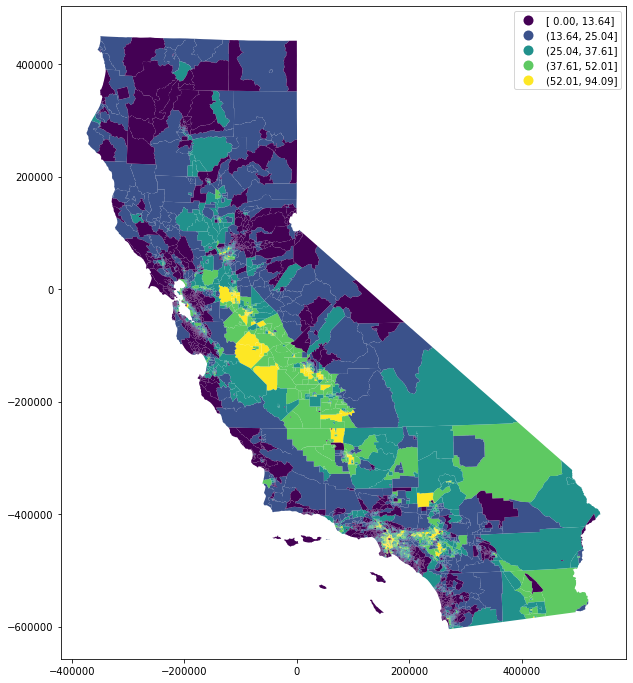

In [42]:
# to map the sorted dataframe using geopanas chloropleth maps
gdf_sortbyCES.plot(figsize=(12,12),
                   column='CIscore',
                   legend=True,
                   scheme='NaturalBreaks')

I got the map to show the CES scores by county. Now I am going to overlay fossil fuel jobs and CalEnviroScreen data.

In the next three lines of code, I am checking  what CRS our data is in.

In [43]:
print(gdf.crs)

epsg:3310


In [44]:
print(clean.crs)

None


In [45]:
print(counties.crs)

epsg:3857


CRS data is showing up for the counties data set (which produce the clean_counties data frame) as well as the gdf data set.

In [46]:
#create a new variable that sets clean_counties crs to the counties crs. 
clean_counties = clean_counties.set_crs('epsg:3857')

#convert clean_counties to the same crs as the gdf dataframe. 
cleanjobsreproject = clean_counties.to_crs('epsg:3310')

For my final map, I want to plot the counties with clean energy job counts in the upper quartile of all counties in California.

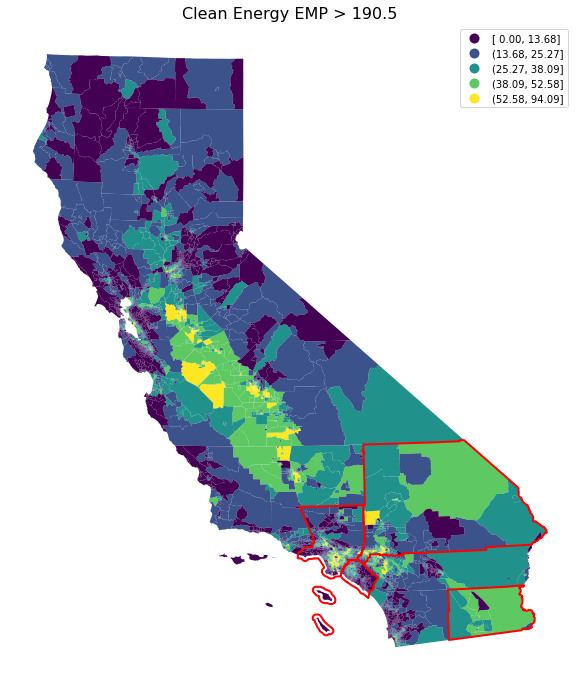

In [47]:
# use subplots that make it easier to create multiple layered maps. 
fig, ax = plt.subplots(figsize=(12, 12))

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Clean Energy EMP > 190.5',fontsize=16)

# first layer
gdf_sortbyCES.plot(figsize=(12,12),
                   column='CIscore',
                   legend=True,
                   scheme='NaturalBreaks',
                  ax=ax)

# second layer
cleanjobsreproject[cleanjobsreproject['EMP'] > 190.5].plot(ax=ax,edgecolor='red',color='none',linewidth=2)

All done! The four counties in the upper quartile of highest number of clean energy jobs are Los Angeles County, San Bernadino County, Imperial County, and Orange County (as plotted here).